In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import os
import re
from scipy.signal import savgol_filter

In [137]:
def filtering1d(data):
    return savgol_filter(data,50,3)

In [157]:
def filtering2d(data):
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            data[:,i,j] = filtering1d(data[:,i,j])
    return data

In [3]:
# Path to the folder containing your CSV files
csv_folder = "/Users/jaworskj/Desktop/Infrared_thermography/Measurments/Measurment_0_nf/temperature_data"  # Replace with your folder path
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# Extract the numeric value from the filename using regex
def extract_number(file_name):
    match = re.search(r'\d+', os.path.basename(file_name))
    return int(match.group()) if match else float('inf')  # Use 'inf' if no number is found

# Sort files by the numeric value in their names
csv_files = sorted(csv_files, key=extract_number)

# Initialize an empty list to store 2D arrays
frames = []

# Loop through CSV files and load them as 2D arrays
for csv_file in csv_files:
    data = np.loadtxt(csv_file, delimiter=",")  # Load CSV file as a NumPy array
    frames.append(data)

# Stack all 2D arrays into a 3D array
stacked_array = np.stack(frames, axis=0)

print(f"3D Array shape: {stacked_array.shape}")

3D Array shape: (1500, 512, 640)


In [87]:
frames=stacked_array[:,:,64:640-64]#Same dimmensions of the images
frames=frames[:,170:300,150:350]#focus on defect sample

In [88]:
x=np.arange(frames.shape[2])
y=np.arange(frames.shape[1])
X,Y=np.meshgrid(x,y)

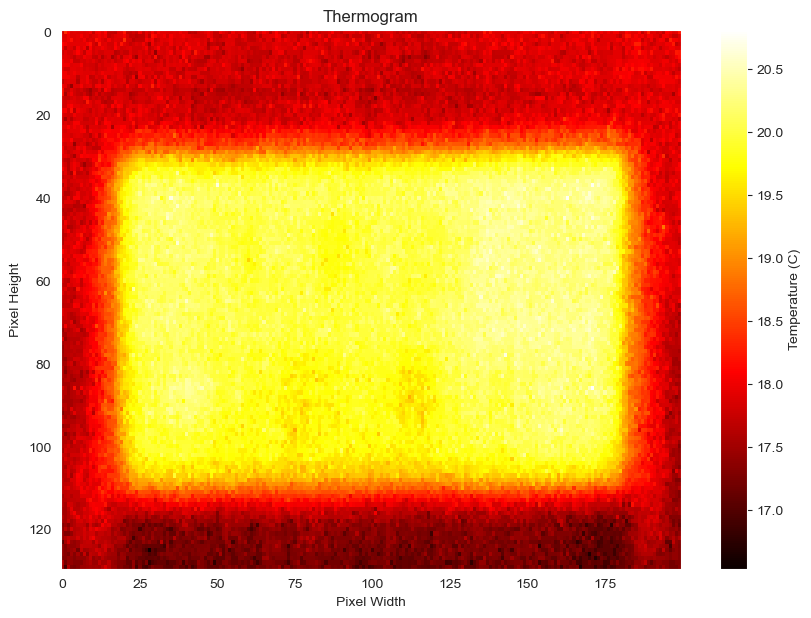

In [101]:
plt.figure(figsize=(10,7))
plt.pcolormesh(X,Y,frames[900],cmap='hot')
plt.colorbar(label='Temperature (C)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.gca().invert_yaxis()
plt.title("Thermogram")
plt.show()

In [161]:
sound_material=frames[:,70,160]

In [162]:
defect_material=frames[:,90,115]

In [163]:
sound_material2=frames[:,70,30]

In [150]:
x_small=np.arange(frames.shape[0])

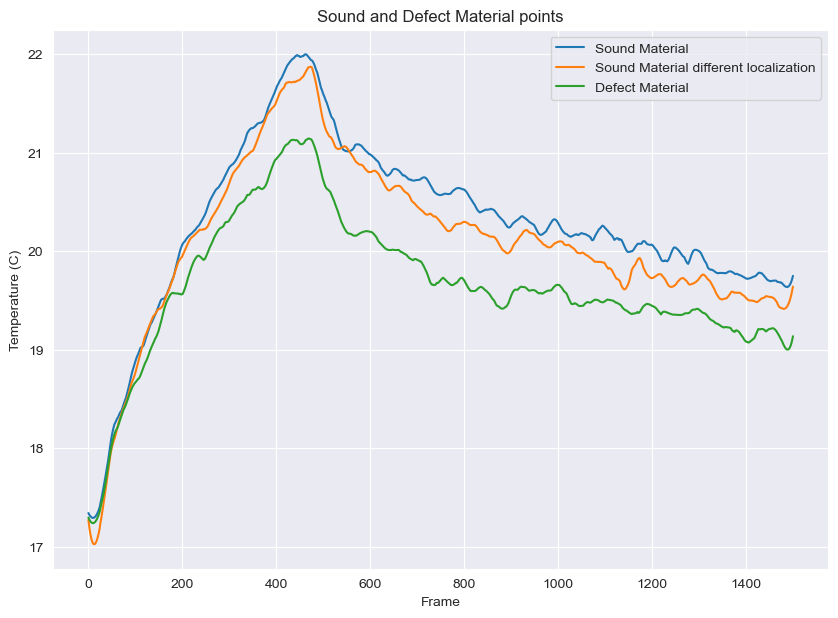

In [164]:
plt.figure(figsize=(10,7))
plt.plot(x_small,sound_material,label='Sound Material')
plt.plot(x_small,sound_material2,label='Sound Material different localization')
plt.plot(x_small,defect_material,label='Defect Material')
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Temperature (C)")
plt.title("Sound and Defect Material points")
plt.show()

In [152]:
sound_material=filtering1d(sound_material)

In [153]:
sound_material2=filtering1d(sound_material2)

In [154]:
defect_material=filtering1d(defect_material)

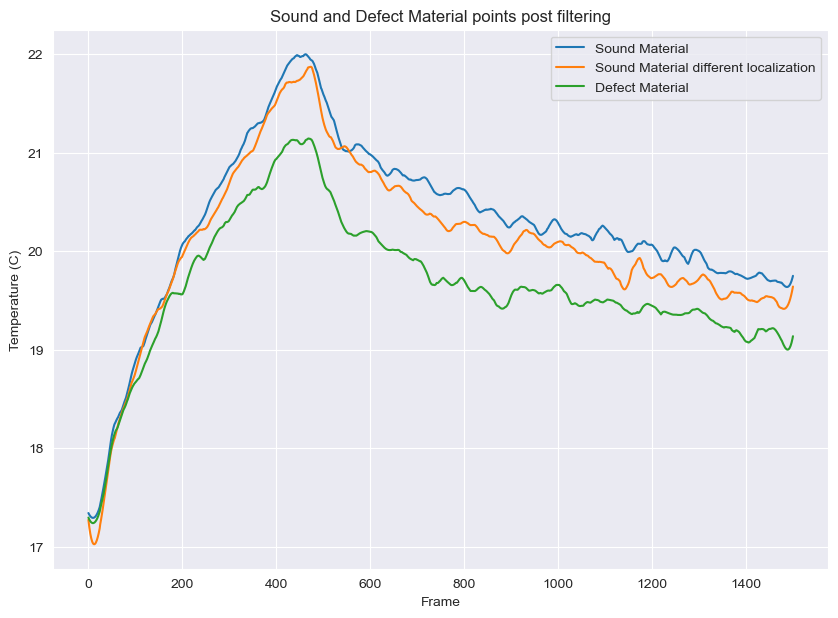

In [155]:
plt.figure(figsize=(10,7))
plt.plot(x_small,sound_material,label='Sound Material')
plt.plot(x_small,sound_material2,label='Sound Material different localization')
plt.plot(x_small,defect_material,label='Defect Material')
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Temperature (C)")
plt.title("Sound and Defect Material points post filtering")
plt.show()